In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:, [2,3]]
y = iris.target

In [5]:
print(f'class labels: {np.unique(y)}')

class labels: [0 1 2]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
print(f'class distribution {np.bincount(y)}')
print(f'class distribution {np.bincount(y_train)}')
print(f'class distribution {np.bincount(y_test)}')


class distribution [50 50 50]
class distribution [35 35 35]
class distribution [15 15 15]


In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [13]:
y_pred = ppn.predict(X_test_std)
print(f'total misclassifications: {(y_pred != y_test).sum()}')

total misclassifications: 1


In [15]:
print(f'Score: {ppn.score(X_test_std, y_test):.3f}')

Score: 0.978


In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                    y=X[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolors='black'
                    )

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolors='black', alpha=1.0,
            linewidths=1, marker='o',
            s=100, label='Test set')

    

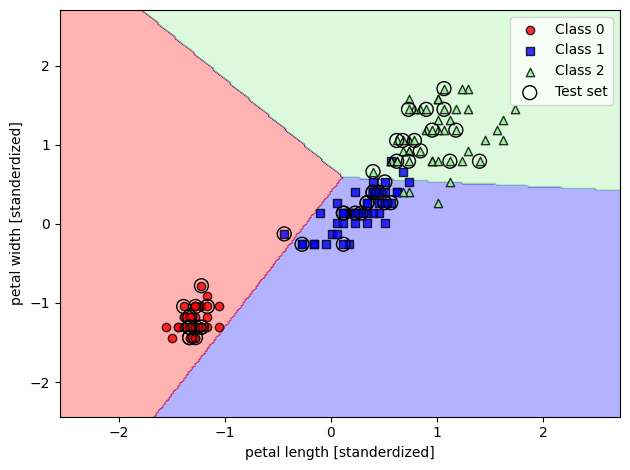

In [23]:
X_combined_stack = np.vstack((X_train_std, X_test_std))
y_combined_stack = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_stack, y_combined_stack, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standerdized]')
plt.ylabel('petal width [standerdized]')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
y_train.shape, X_train_std.shape

((105,), (105, 2))

In [26]:
y_test.shape, X_test_std.shape

((45,), (45, 2))

In [21]:
y_train.ndim

1

In [22]:
y_test.ndim

1